# Imports and Device

In [1]:
import torch
import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import torch.nn as nn
import torch.nn.functional as F

import math
import time

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Data Loading

## First check the shapes and stuff

In [3]:
root_path = "/scratch/04703/sravula/UTAFSDataNew/new_data"
chip_num = 29

In [4]:
import utils

data_dict = utils.grab_chip_data(root_path, chip_num)

In [5]:
data_dict.keys()

dict_keys(['gt_matrix', 'gt_freqs', 'vf_matrix', 'y_matrix', 'y_freqs'])

In [6]:
print(data_dict['gt_matrix'].shape)
print(data_dict['vf_matrix'].shape)
print(data_dict['y_matrix'].shape)

print(data_dict['gt_freqs'].shape)
print(data_dict['y_freqs'].shape)

(7000, 16, 16, 2)
(7000, 16, 16, 2)
(27, 16, 16, 2)
(7000,)
(27,)


## Look at the frequencies to see if there's equal-ish spacing

NUM UNIQUE SPACINGS:  7
[1.96621207e+08 9.69819192e+08 1.68750000e+09 2.39177980e+09
 2.39177980e+09 3.37500000e+09 6.75000000e+09]


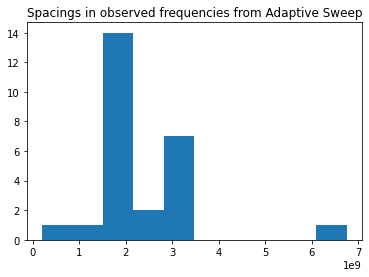

In [7]:
diff_vals = []

for i in range(len(data_dict['y_freqs'])):
    if i == len(data_dict['y_freqs'])-1:
        break
    diff_vals.append(data_dict['y_freqs'][i+1]-data_dict['y_freqs'][i])

unique_vals = np.unique(diff_vals)
print("NUM UNIQUE SPACINGS: ", str(len(unique_vals)))
print(unique_vals)
    
plt.plot()
plt.hist(diff_vals)
plt.title("Spacings in observed frequencies from Adaptive Sweep")
plt.show()

NUM UNIQUE SPACINGS:  25
[8565509.3584671  8565509.35846901 8565509.35847092 8565509.35847473
 8565509.35847855 8565509.35847878 8565509.3584789  8565509.35847902
 8565509.3584795  8565509.35847968 8565509.35847971 8565509.35847974
 8565509.35847978 8565509.3584798  8565509.35847986 8565509.35847992
 8565509.35847998 8565509.3584801  8565509.35848022 8565509.35848045
 8565509.35848141 8565509.35848236 8565509.35848999 8565509.3584919
 8565509.35849762]


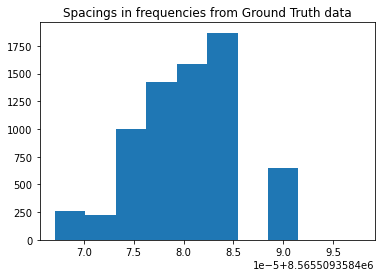

In [8]:
diff_vals = []

for i in range(len(data_dict['gt_freqs'])):
    if i == len(data_dict['gt_freqs'])-1:
        break
    diff_vals.append(data_dict['gt_freqs'][i+1]-data_dict['gt_freqs'][i])

    
unique_vals = np.unique(diff_vals)
print("NUM UNIQUE SPACINGS: ", str(len(unique_vals)))
print(unique_vals)

plt.plot()
plt.hist(diff_vals)
plt.title("Spacings in frequencies from Ground Truth data")
plt.show()

## See how much overlap there is between the GT freqs and the adaptive sweep freqs

In [9]:
kept_inds, A = utils.frequencies_to_samples(data_dict['gt_freqs'], data_dict['y_freqs'])

In [10]:
print(len(kept_inds))
print(kept_inds)
print(A.shape)

2
[   0 6999]
(2, 7000)


## Convert the three datas into more usable forms and see what's up

In [11]:
vf_data = utils.matrix_to_sparams(data_dict['vf_matrix'])
gt_data = utils.matrix_to_sparams(data_dict['gt_matrix'])
y_data = utils.matrix_to_sparams(data_dict['y_matrix'])

In [12]:
print(vf_data.shape)
print(gt_data.shape)
print(y_data.shape)

(136, 2, 7000)
(136, 2, 7000)
(136, 2, 27)


/scratch/04703/sravula/conda_local/envs/devito-base/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


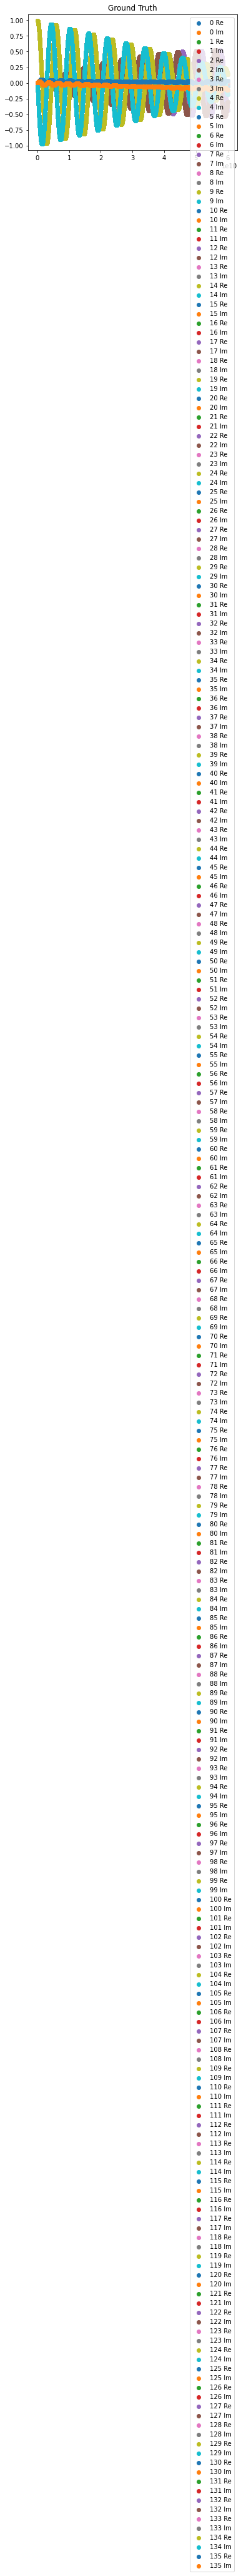

In [13]:
n_sparams = gt_data.shape[0]

plt.figure()
for i in range(n_sparams):
    plt.scatter(data_dict['gt_freqs'], gt_data[i,0,:].squeeze(), label=str(i)+" Re")
    plt.scatter(data_dict['gt_freqs'], gt_data[i,1,:].squeeze(), label=str(i)+" Im")
plt.legend()
plt.title("Ground Truth")
plt.show()

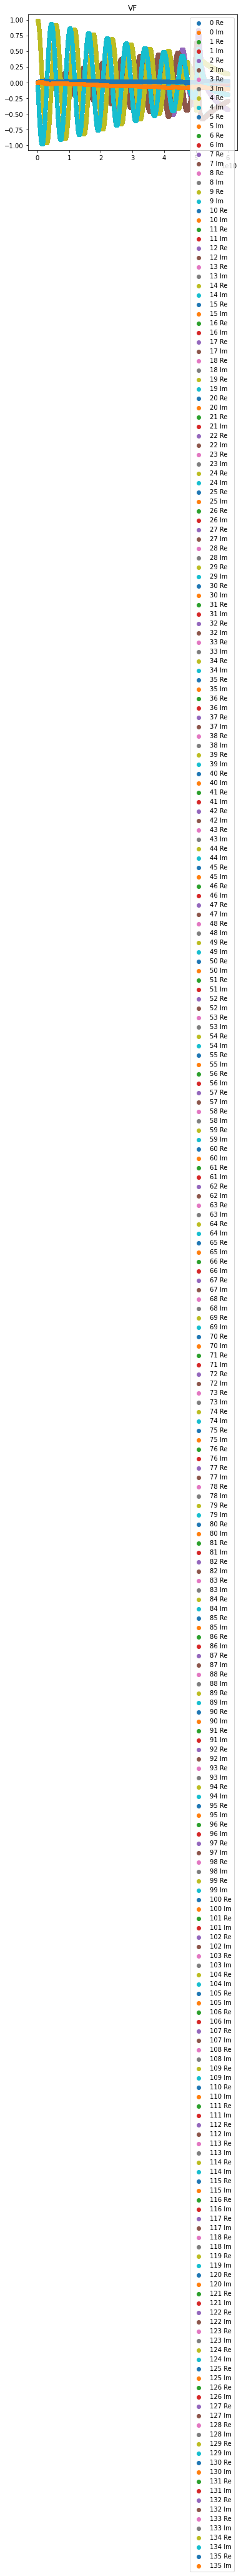

In [14]:
plt.figure()
for i in range(n_sparams):
    plt.scatter(data_dict['gt_freqs'], vf_data[i,0,:].squeeze(), label=str(i)+" Re")
    plt.scatter(data_dict['gt_freqs'], vf_data[i,1,:].squeeze(), label=str(i)+" Im")
plt.legend()
plt.title("VF")
plt.show()

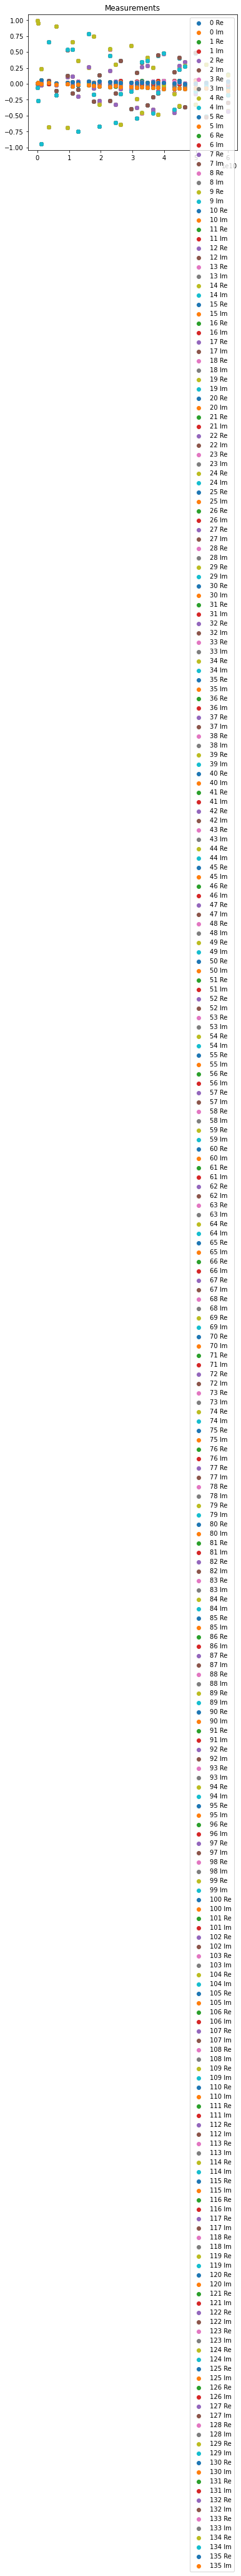

In [15]:
plt.figure()
for i in range(n_sparams):
    plt.scatter(data_dict['y_freqs'], y_data[i,0,:].squeeze(), label=str(i)+" Re")
    plt.scatter(data_dict['y_freqs'], y_data[i,1,:].squeeze(), label=str(i)+" Im")
plt.legend()
plt.title("Measurements")
plt.show()